In [33]:
# Import libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from wordcloud import WordCloud
from collections import Counter
from sklearn.preprocessing import LabelEncoder

In [34]:
column_names = [
    'id', 'label', 'statement', 'subject', 'speaker', 'speaker_job_title', 
    'state', 'party', 'barely_true_counts', 'false_counts', 'half_true_counts', 
    'mostly_true_counts', 'pants_on_fire_counts', 'context'
]
data = pd.read_csv('../Dataset_Original/LIAR/train.tsv', sep='\t', names=column_names, header=None)

# Data overview

In [35]:
# Data exploration
data.head()

,id,label,statement,subject,speaker,speaker_job_title,state,party,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context
0,2635.json,false,Says the Annies List political group supports third-trimester abortions on demand.,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,half-true,When did the decline of coal start? It started when natural gas took off that started to begin in (President George W.) Bushs administration.,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by voting to give George Bush the benefit of the doubt on Iran.""",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
3,1123.json,false,Health care reform legislation is likely to mandate free sex change surgeries.,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
4,9028.json,half-true,The economic turnaround started at the end of my term.,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN


In [36]:
# Drop the id column
data.drop('id', axis=1, inplace=True)
columns = data.columns

In [37]:
print(data['label'].value_counts())

label
half-true      2114
false          1995
mostly-true    1962
true           1676
barely-true    1654
pants-fire      839
Name: count, dtype: int64


## Correlation matrix

In [38]:
column_names = [
    'id', 'label', 'statement', 'subject', 'speaker', 'speaker_job_title', 
    'state', 'party', 'barely_true_counts', 'false_counts', 'half_true_counts', 
    'mostly_true_counts', 'pants_on_fire_counts', 'context'
]

In [39]:
encoded_data = data.copy()
label_encoder = LabelEncoder()

encode_columns = ['label', 'subject', 'party', 'state', 'speaker', 'speaker_job_title', 'context']
# Label Encoding 
for column in encode_columns:
    encoded_data[column+"_encoded"] = label_encoder.fit_transform(encoded_data[column])


# Drop original categorical columns that have been encoded
encoded_data.drop(['label', 'statement', 'subject', 'party', 'state', 'speaker', 'speaker_job_title', 'context'], axis=1, inplace=True)

# Calculate correlation
correlation_matrix = encoded_data.corr()

# Display the correlation with the encoded label column
print(correlation_matrix['label_encoded'])

barely_true_counts          -0.015425
false_counts                -0.020387
half_true_counts             0.024661
mostly_true_counts           0.032682
pants_on_fire_counts         0.007652
label_encoded                1.000000
subject_encoded             -0.013754
party_encoded               -0.082425
state_encoded               -0.012555
speaker_encoded             -0.033293
speaker_job_title_encoded   -0.003589
context_encoded              0.011205
Name: label_encoded, dtype: float64


# Missing & duplicate values

In [40]:
data.isnull().sum()

label                      0
statement                  0
subject                    2
speaker                    2
speaker_job_title       2898
state                   2210
party                      2
barely_true_counts         2
false_counts               2
half_true_counts           2
mostly_true_counts         2
pants_on_fire_counts       2
context                  102
dtype: int64

In [41]:
def print_unique_values(df, columns):
    for column in columns:
        if column != 'id':
            num_unique_values = df[column].nunique()
            print(f'{column}: {num_unique_values}/{df.shape[0]}')

print_unique_values(data, columns)

label: 6/10240
statement: 10223/10240
subject: 3827/10240
speaker: 2910/10240
speaker_job_title: 1183/10240
state: 83/10240
party: 23/10240
barely_true_counts: 30/10240
false_counts: 30/10240
half_true_counts: 29/10240
mostly_true_counts: 27/10240
pants_on_fire_counts: 20/10240
context: 4345/10240


In [42]:
print("Duplicate statements: ", data['statement'].duplicated().sum())

Duplicate statements:  17


# Distribution of statement length

In [43]:
is_string_statements = data['statement'].apply(lambda x: isinstance(x, str))
data['statement_length'] = data['statement'][is_string_statements].apply(len)
print(data['statement_length'].describe())

count    10240.000000
mean       106.918750
std         59.917722
min         11.000000
25%         73.000000
50%         99.000000
75%        132.250000
max       3192.000000
Name: statement_length, dtype: float64


In [44]:
print(data[data['statement_length']==11]['statement'])

709     On abortion
1014    On abortion
1071    On torture.
6759    On torture.
Name: statement, dtype: object


In [45]:
# Set the display option to None (no limit)
pd.set_option('display.max_colwidth', None)
print(data[data['statement_length']==3192]['statement'])

1280    Hospitals, doctors, MRIs, surgeries and so forth are more extensively used and far more expensive in this country than they are in many other countries.''\thealth-care\tmitt-romney\tFormer governor\tMassachusetts\trepublican\t34\t32\t58\t33\t19\ta Fox News Sunday interview\n9874.json\tbarely-true\tObamacare cuts seniors Medicare.\thealth-care,medicare\ted-gillespie\tRepublican strategist\tWashington, D.C.\trepublican\t2\t3\t2\t2\t1\ta campaign email.\n3072.json\tmostly-true\tThe refusal of many federal employees to fly coach costs taxpayers $146 million annually.\tgovernment-efficiency,transparency\tnewsmax\tMagazine and website\tFlorida\tnone\t0\t0\t0\t1\t0\tan e-mail solicitation\n2436.json\tmostly-true\tFlorida spends more than $300 million a year just on children repeating pre-K through 3rd grade.\teducation\talex-sink\t\tFlorida\tdemocrat\t1\t2\t2\t4\t0\tfigures cites on campaign website\n9721.json\ttrue\tMilwaukee County Sheriff David A. Clarke Jr. advised citizens to poi

/tmp/ipykernel_14014/201388797.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(boxplot_data, vert=False, labels=unique_labels)


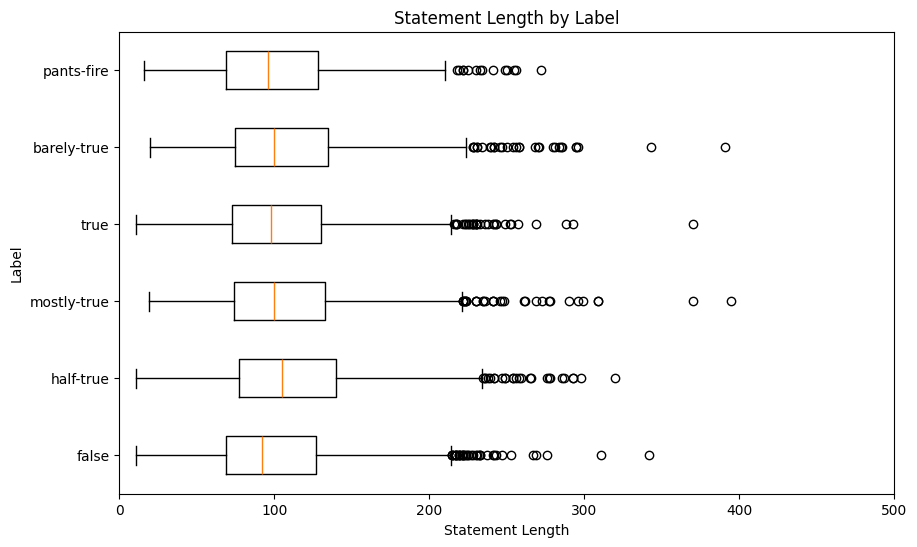

In [46]:
# Get unique labels
unique_labels = data['label'].unique()

# Prepare data for boxplot
boxplot_data = [data[data['label'] == label]['statement_length'] for label in unique_labels]

# Create boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(boxplot_data, vert=False, labels=unique_labels)
plt.title('Statement Length by Label')
plt.xlabel('Statement Length')
plt.ylabel('Label')
plt.xlim(0, 500) 
plt.show()

## Below 20 characters

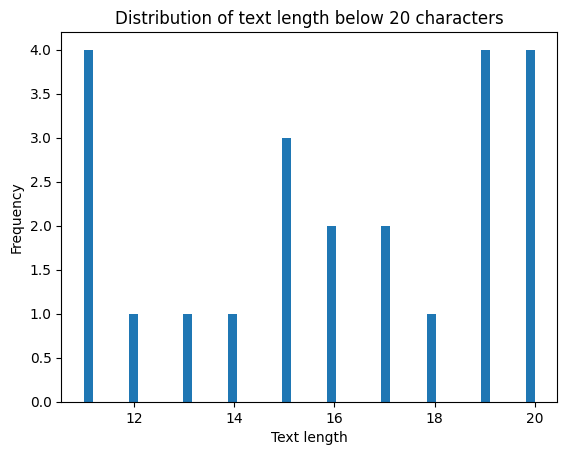

In [47]:
plt.hist(data['statement_length'], bins=50, range=[11, 20])
plt.title('Distribution of text length below 20 characters')
plt.xlabel('Text length')
plt.ylabel('Frequency')
plt.show()

In [48]:
print(data[data['statement_length']<20])

            label            statement  \
470    pants-fire     Crime is rising.   
709         false          On abortion   
1014    half-true          On abortion   
1071         true          On torture.   
2274  mostly-true  I was filibustered.   
2940        false    On reconciliation   
3481        false  On high-speed rail.   
3520    half-true  On abortion rights.   
3623    half-true  Weve rebuilt China.   
6131        false       Were bankrupt.   
6527        false         On abortion.   
6759    half-true          On torture.   
7358    half-true        On gun policy   
7638        false     On sequestration   
7820        false      On gay marriage   
8283        false      On Common Core.   
8642         true      On oil drilling   
8787        false    On raising taxes.   
9131         true   Farouk is on fire.   

                                              subject           speaker  \
470                            crime,criminal-justice      donald-trump   
709      

## From 20 to 100

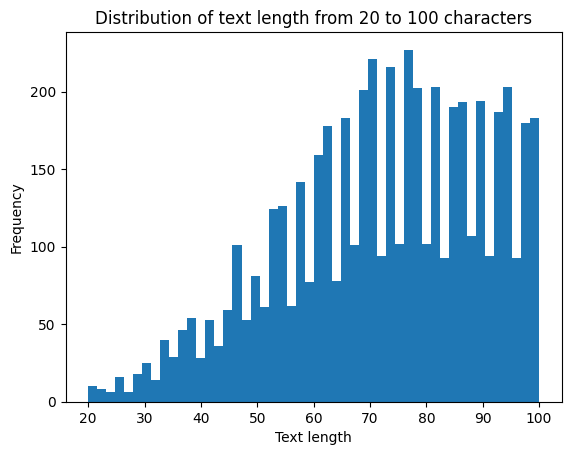

In [49]:
plt.hist(data['statement_length'], bins=50, range=[20, 100])
plt.title('Distribution of text length from 20 to 100 characters')
plt.xlabel('Text length')
plt.ylabel('Frequency')
plt.show()

In [50]:
print(data[data['statement_length']==76]['statement'])

65       Transgender individuals in the U.S. have a 1-in-12 chance of being murdered.
186      Payday lenders profit from the poor by charging 1,000-plus percent interest.
204      Says Obama health reform law denies millions access to affordable insurance.
360      Says Texas routinely gets a lot more federal spending than it pays in taxes.
382      2008 was the deadliest year of the war (in Afghanistan) for American forces.
                                             ...                                     
9955     Says Carlos Beruff supported (Charlie) Crist even after he switched parties.
10053    We have had over 40 days this summer where it was unsafe to breathe the air.
10132    Brock Turners early release will be a regular occurrence if Prop. 57 passes.
10185    Says Ted Cruz just flip-flopped about the president needing to be U.S.-born.
10220    Says he and Mitt Romney agreed on tying minimum wage increases to inflation.
Name: statement, Length: 123, dtype: object


## Above 100 characters

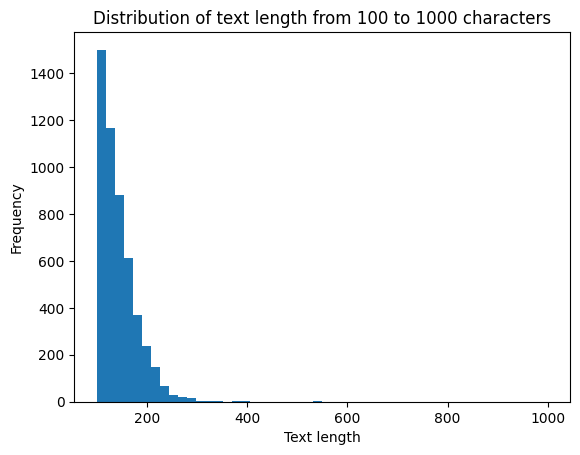

In [51]:
plt.hist(data['statement_length'], bins=50, range=[100, 1000])
plt.title('Distribution of text length from 100 to 1000 characters')
plt.xlabel('Text length')
plt.ylabel('Frequency')
plt.show()

In [52]:
print(data[data['statement_length']==100]['statement'])

102      Raising the minimum wage to $10.10 an hour, would help lift over a million Americans out of poverty.
198      While our people work longer hours for lower wages, almost all new income goes to the top 1 percent.
393      Under a proposed medical marijuana amendment in Florida, you dont get refills -- you get it forever.
448      What the Arizona law does is make a state crime out of something that already is... a federal crime.
488      In the entire public school system in Camden last year, only three students graduated college ready.
                                                         ...                                                 
9886     ﻿Says JoAnne Kloppenburgs side had a 3-to-1 money advantage in the Wisconsin Supreme Court campaign.
9916     The president won the youth vote 3 to1, but his numbers have dropped 20, 30 percent among the youth.
10079    Tim Kaine reduced higher education funding by 25 percent when he was governor, driving up tuition...
10111    T

## Above 1000 characters

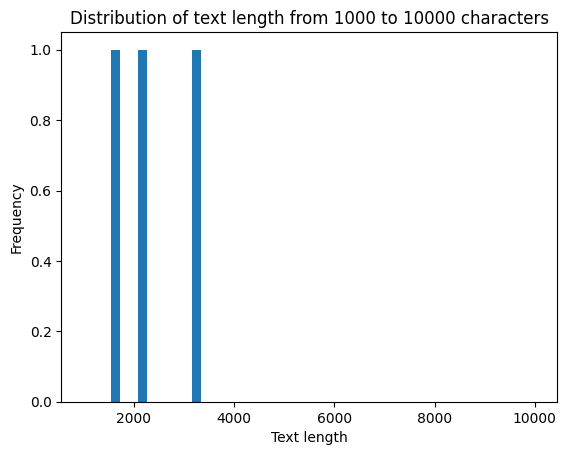

In [53]:
plt.hist(data['statement_length'], bins=50, range=[1000, 10000])
plt.title('Distribution of text length from 1000 to 10000 characters')
plt.xlabel('Text length')
plt.ylabel('Frequency')
plt.show()

## Trust worthiness of speaker

In [54]:
def calculate_trustworthiness(row):
    total_statements = (
        row['barely_true_counts'] + row['false_counts'] + 
        row['half_true_counts'] + row['mostly_true_counts'] + 
        row['pants_on_fire_counts']
    )
    if total_statements == 0:
        return 0
    trustworthiness = (row['true_counts'] + row['mostly_true_counts']) / total_statements
    return trustworthiness
data['true_counts'] = data['label'].apply(lambda x: 1 if x == 'true' else 0)
speaker_group = data.groupby('speaker').sum().reset_index()
speaker_group['trustworthiness'] = speaker_group.apply(calculate_trustworthiness, axis=1)
print(speaker_group[['speaker', 'trustworthiness']])

                              speaker  trustworthiness
0          18-percent-american-public         0.500000
1                 60-plus-association         0.000000
2                                AARP         1.000000
3     Arizona-Citizens-Defense-League         0.000000
4                         Ballesteros         0.000000
...                               ...              ...
2905               yvette-mcgee-brown         0.000000
2906                       zack-space         0.000000
2907                      zell-miller         0.666667
2908                  zephyr-teachout         0.000000
2909                      zoe-lofgren         1.000000

[2910 rows x 2 columns]
